In [13]:
import pandas as pd

df = pd.read_excel("EastWestAirlines.xlsx", sheet_name=0)

#numeric columns for IQR filtering
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filtering non-outliers
filtered_df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape before:", df.shape)
print("Shape after removing outliers:", filtered_df.shape)


Shape before: (26, 5)
Shape after removing outliers: (26, 5)


In [18]:
print(filtered_df.dtypes)

East-West Airlines is trying to learn more about its customers.  Key issues are their    object
Unnamed: 1                                                                               object
Unnamed: 2                                                                               object
Unnamed: 3                                                                               object
Unnamed: 4                                                                               object
dtype: object


In [19]:
# Trying to convert all columns to numeric where ever possible
df_converted = filtered_df.apply(pd.to_numeric, errors='coerce')

# Droping all columns that are still completely non-numeric
numeric_filtered_df = df_converted.dropna(axis=1, how='all')

# Droping all rows with missing values after conversion
numeric_filtered_df = numeric_filtered_df.dropna()

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_filtered_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_filtered_df.columns)

print(scaled_df.head())


   Unnamed: 2
0    1.224745
1    1.224745
2   -0.816497
3   -0.816497
4   -0.816497


In [23]:
#Checking numeric columns existed
numeric_df = df_clean.select_dtypes(include=['number'])
print("Numeric columns:", numeric_df.columns)

#Checking if DataFrame is empty or not
if numeric_df.empty:
    print("No numeric data available for correlation.")
else:
    #Ploting correlation heatmap if data is present else ignore
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap (Numeric Features Only)")
    plt.show()


Numeric columns: Index([], dtype='object')
No numeric data available for correlation.


In [24]:
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')
numeric_df = df_clean.dropna(axis=1, how='all')

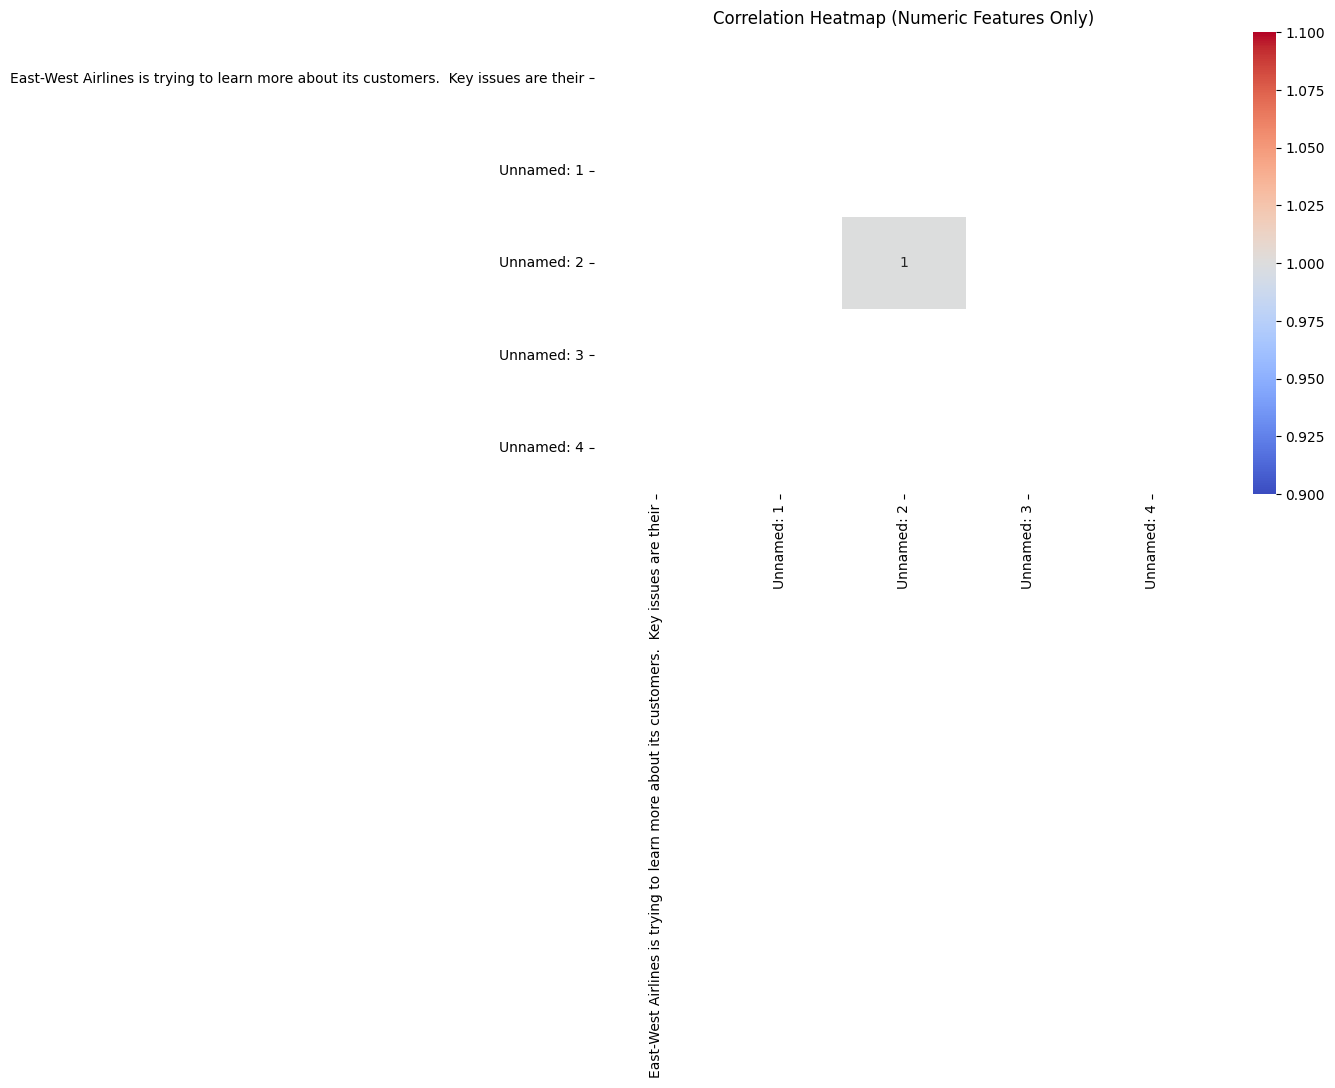

In [25]:
#eda
import seaborn as sns
import matplotlib.pyplot as plt

# keep numeric columns for doing correlation
numeric_df = df_clean.select_dtypes(include=['number'])

#Plotting heatmap for all numeric data
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\yasha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


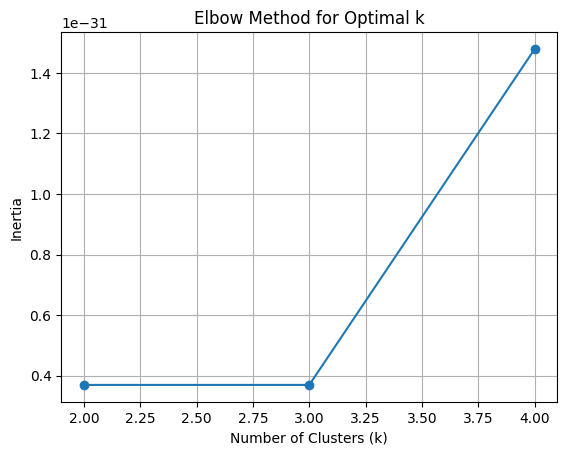

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_k = min(10, scaled_data.shape[0])

inertia = []
for k in range(2, max_k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# elbow curve
plt.plot(range(2, max_k), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()



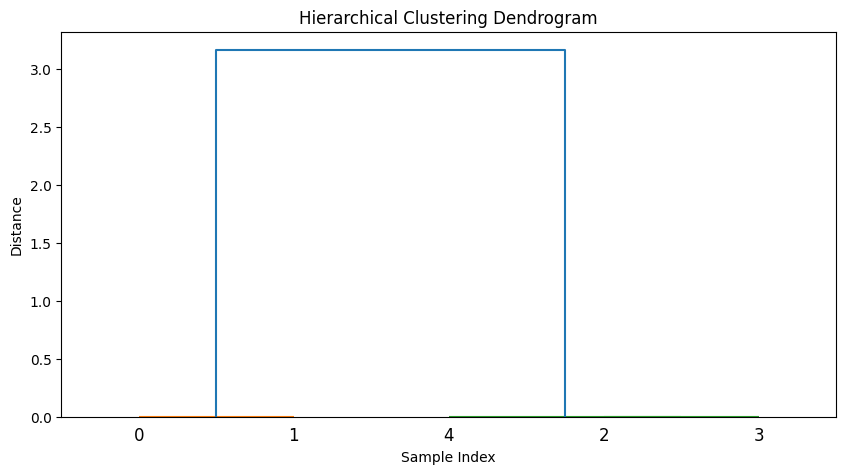

In [28]:
#hirarchial clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Dendrogram creation
plt.figure(figsize=(10, 5))
Z = linkage(scaled_data, method='ward')
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

#clustering
labels_hier = fcluster(Z, 4, criterion='maxclust')

In [35]:
#DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=2)  # try tuning these values
labels_dbscan = dbscan.fit_predict(scaled_data)

# detected clusters
unique_clusters = set(labels_dbscan)
print("DBSCAN Clusters:", unique_clusters)

#Checking at least 2 of clusters existwith noise involved
if len(unique_clusters - {-1}) >= 2:
    mask = labels_dbscan != -1
    score = silhouette_score(scaled_data[mask], labels_dbscan[mask])
    print("DBSCAN Score (remove noise):", score)
else:
    print("Not enough clusters formed for score.")


DBSCAN Clusters: {0, 1}
DBSCAN Score (remove noise): 1.0


In [32]:
print("Scaled data shape:", scaled_data.shape)

Scaled data shape: (5, 1)


In [37]:
#visualisation
from sklearn.decomposition import PCA

if scaled_data.shape[0] >= 2 and scaled_data.shape[1] >= 2:
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_data)

    # k-means plotting
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_kmeans, cmap='tab10')
    plt.title("K-Means Clusters (PCA Reduced)")
    plt.show()
else:
    print("no enough data for PCA. At least 2 samples and 2 features are required.")


no enough data for PCA. At least 2 samples and 2 features are required.
